In [1]:
import sympy as sym 
import numpy as np 
import mpmath
import matplotlib.pyplot as plt

# Fourier Series 

Fourier series are orthogonal functions which are helpful when solving matrix systems 

In [3]:
def least_squares_numeric(f, psi, Omega):
    N = len(psi)
    A = sym.zeros(N, N)
    b = sym.zeros(N, 1)
    x = sym.Symbol('x')

    # construct A, b
    # ! the loop below can be optimized, since A[i,j] = A[j,i]
    for i in range(N):
        for j in range(N):
            integrate = sym.lambdify(x, psi[i]*psi[j], 'mpmath')
            A[i,j] = mpmath.quad(integrate, [Omega[0], Omega[1]])

        integrate = sym.lambdify(x, psi[i]*f, 'mpmath')
        b[i,0] =  mpmath.quad(integrate, [Omega[0], Omega[1]])

    # solve Ac = b
    c = mpmath.lu_solve(A,b)
    u = 0
    for i in range(N):
        u += c[i,0]*psi[i]
    return u, c

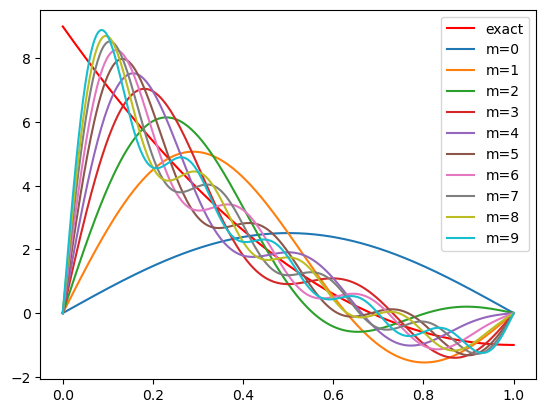

In [4]:
x = sym.Symbol('x')
f = 10*(x-1)**2 - 1
Omega = [0, 1]

f_sym = sym.lambdify(x, f, 'numpy')
resolution = 401
xcoor = np.linspace(Omega[0], Omega[1], resolution)
exact = f_sym(xcoor)
plt.plot(xcoor, exact, '-r', label='exact')
N = 10

psi = []
for n in range(N):
    psi.append(sym.sin(sym.pi * (n+1) * x))
    u, c = least_squares_numeric(f=f, psi=psi, Omega=Omega)
    u_sym = sym.lambdify(x, u, modules='numpy')
    approx = u_sym(xcoor)    
    plt.plot(xcoor, approx, label='m={:}'.format(n))
plt.legend()

The boundary error can be solved by,

$$u(x) = f(0)(1-x) + xf(1)+\sum_{k}^{N}c_k \psi_k(x),$$
where $\psi_k(x) = \sin(k\pi x)$

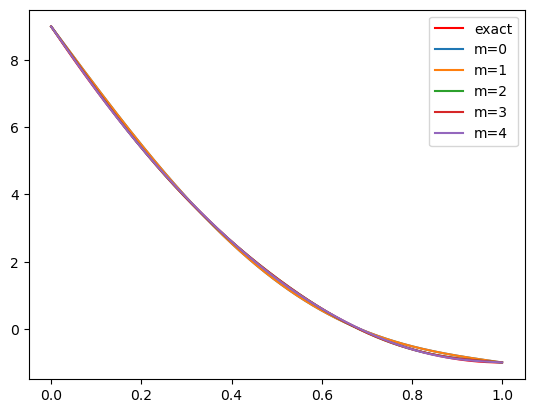

In [20]:
x = sym.Symbol('x')
f = 10*(x-1)**2 - 1
f0 = 9
f1 = -1
B = f0*(1-x) + x*f1
Omega = [0, 1]

f_sym = sym.lambdify(x, f, 'numpy')
resolution = 401
xcoor = np.linspace(Omega[0], Omega[1], resolution)
exact = f_sym(xcoor)
plt.plot(xcoor, exact, '-r', label='exact')
N = 5

psi = []
for n in range(N):
    psi.append(sym.sin(sym.pi * (n+1) * x))
    u, c = least_squares_numeric(f=f-B, psi=psi, Omega=Omega)
    u_sym = sym.lambdify(x, u+B, modules='numpy')
    approx = u_sym(xcoor)    
    plt.plot(xcoor, approx, label='m={:}'.format(n))
plt.legend()